### Визуализация с помощью библиотеки Seaborn

##### Seaborn по сравнению с Matplotlib

In [37]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [38]:
# случайные блуждания
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

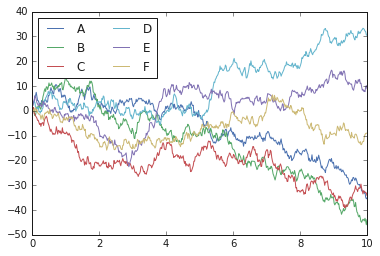

In [39]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [40]:
import seaborn as sns
sns.set()

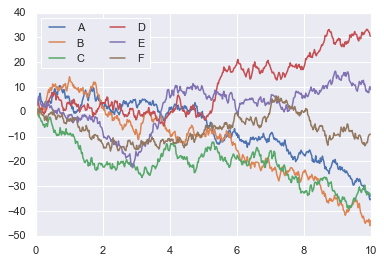

In [41]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

#### Анализируем графики библиотеки Seaborn

##### Гистограммы, KDE и плотности

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


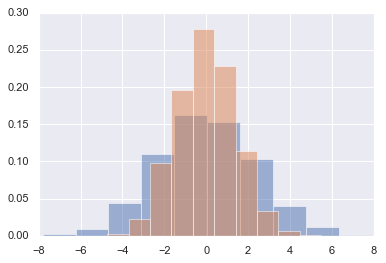

In [42]:
data = np.random.multivariate_normal([0,0], [[5,2],[2,2]],
                                    size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5);

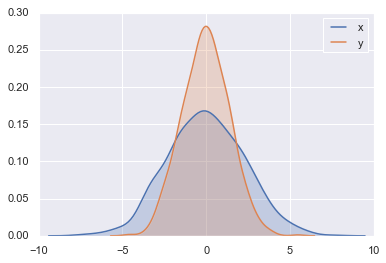

In [43]:
# ядерная оценка плотности распределения
for col in 'xy':
    sns.kdeplot(data[col], shade=True);

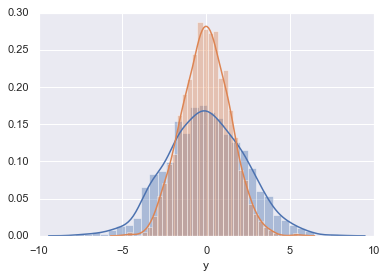

In [44]:
# сочетаем оба способа
sns.distplot(data['x'])
sns.distplot(data['y'])

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


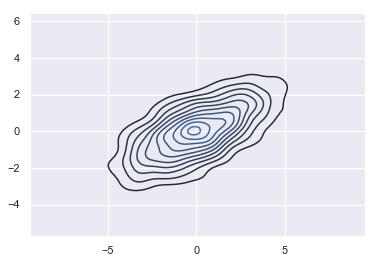

In [45]:
# двумерная визуализация
sns.kdeplot(data);

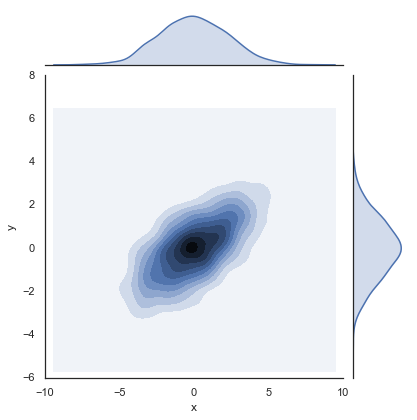

In [46]:
# совместное распределение и частные распределения в одном графике
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

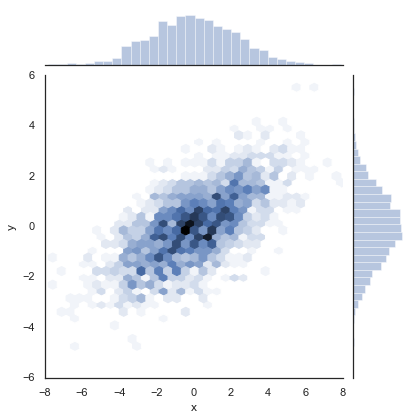

In [47]:
# шестиугольники и бары
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex');

##### Совместные распределения. Пример с ирисами

In [48]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


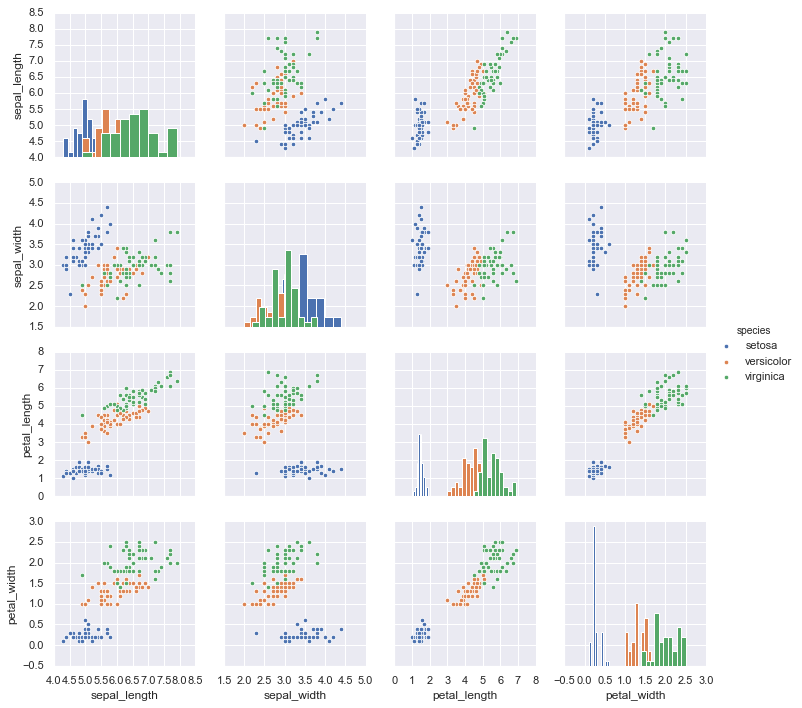

In [49]:
sns.pairplot(iris, hue='species',   kind='scatter', diag_kind = 'hist', size=2.5);

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


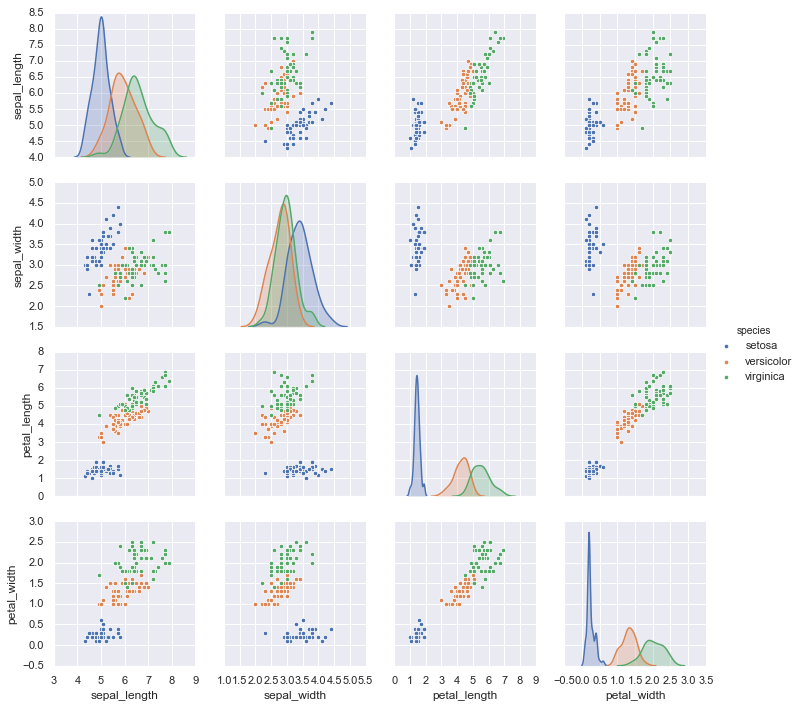

In [50]:
sns.pairplot(iris, hue='species',   size=2.5);

#### Фасетные гистограммы

In [51]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

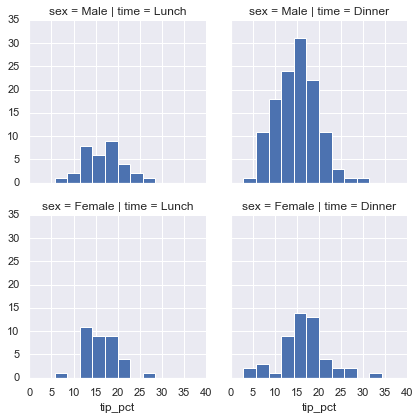

In [53]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=False)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

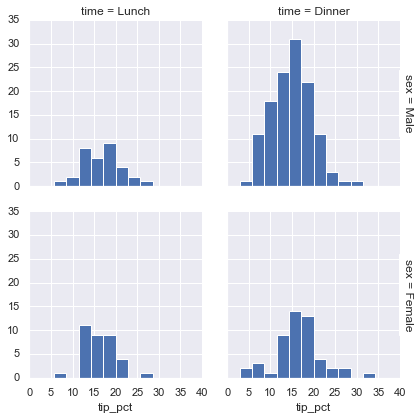

In [54]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

#### Графики факторов

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


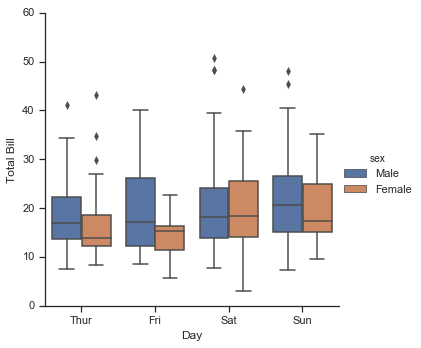

In [55]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips,
                      kind='box')
    g.set_axis_labels("Day", "Total Bill");

#### Совместные распределения

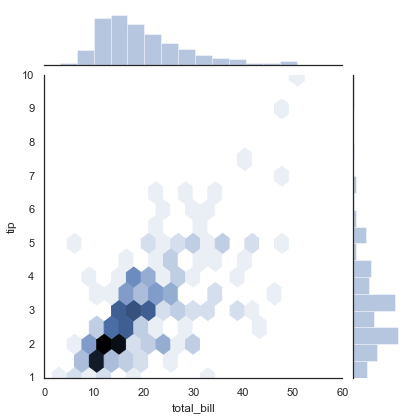

In [56]:
with sns.axes_style(style='white'):
    sns.jointplot("total_bill", "tip", data=tips,
                      kind='hex');

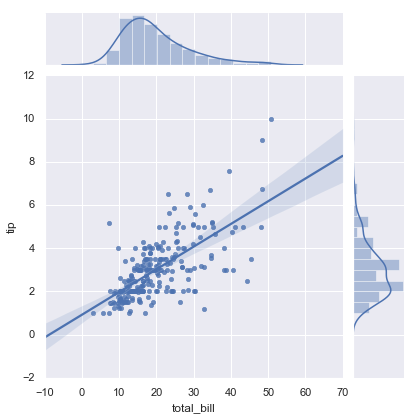

In [59]:
# Ядерная оценка плотности распределения и регрессия
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

#### Столбчатые диаграммы

In [60]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


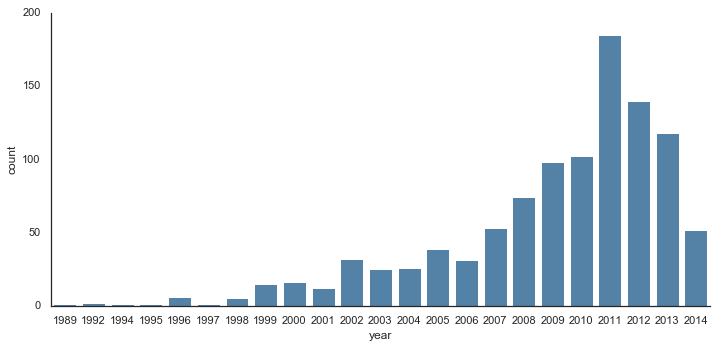

In [66]:
with sns.axes_style('white'):
    d = sns.factorplot("year", data=planets, aspect=2,
                      kind = "count", color = 'steelblue')
    g.set_xticklabels(step=5);

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


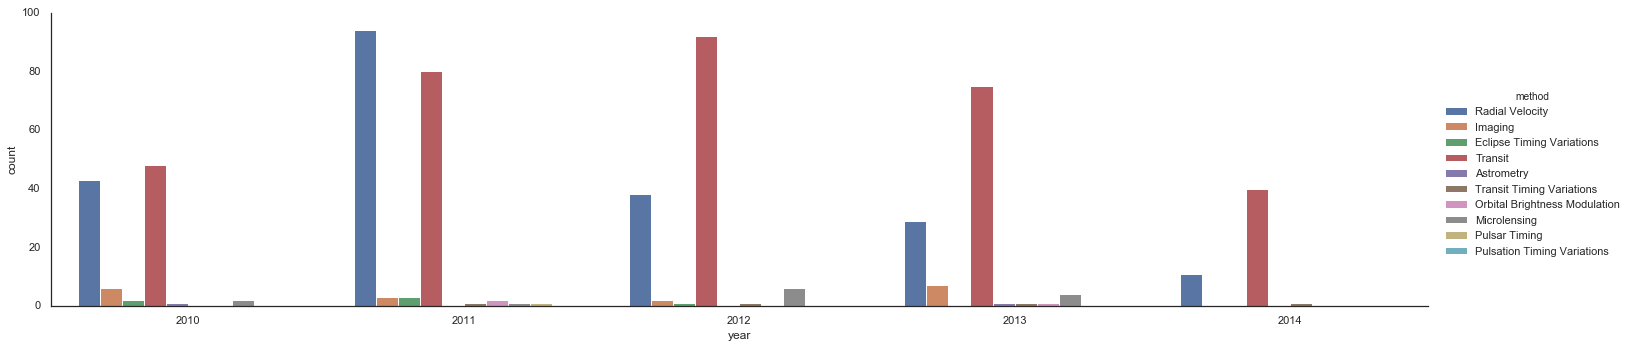

In [70]:
with sns.axes_style('white'):
    d = sns.factorplot("year", data=planets, aspect=4.0,
                      kind = "count", hue = 'method', order = range(2010, 2015))
    g.set_yticklabels('Number of Planets Discoevered');

##### Пример: время прохождения марафона

In [71]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  836k    0  6855    0     0   9364      0  0:01:31 --:--:--  0:01:31  9351
100  836k  100  836k    0     0   781k      0  0:00:01  0:00:01 --:--:--  781k


In [126]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [127]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [128]:
from datetime import timedelta

In [129]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

In [130]:
data = pd.read_csv('marathon-data.csv', converters = {'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [131]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [132]:
def conv_time(time_value):
    timevalue = int(time_value.seconds)
    return timevalue

In [135]:
# выразим врем в секундах

data['split_sec'] = data['split'].apply(conv_time).astype(float)
data['final_sec'] = data['final'].apply(conv_time).astype(float)
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


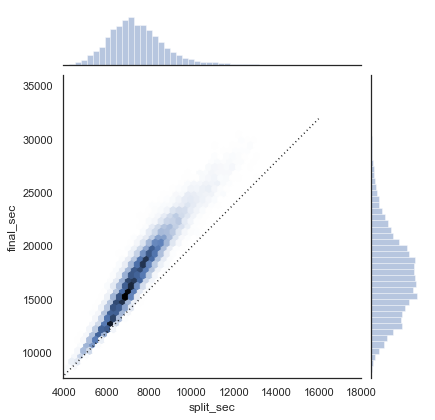

In [136]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind = "hex")
    
    g.ax_joint.plot(np.linspace(4000, 16000),
                   np.linspace(8000, 32000), ':k');

In [137]:
# коэффициент распределения степени обратного распределения сил бегунами
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

In [138]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


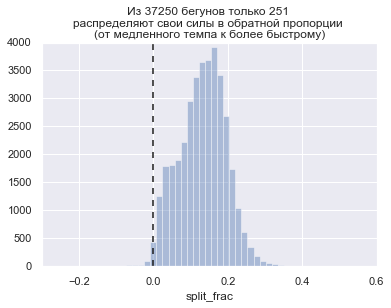

In [154]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0.0, color='k', linestyle="--");

plt.title("Из {} бегунов только {} \nраспределяют свои силы в обратной пропорции \
\n(от медленного темпа к более быстрому)".
         format((data.split_frac).shape[0], sum(data.split_frac < 0)));

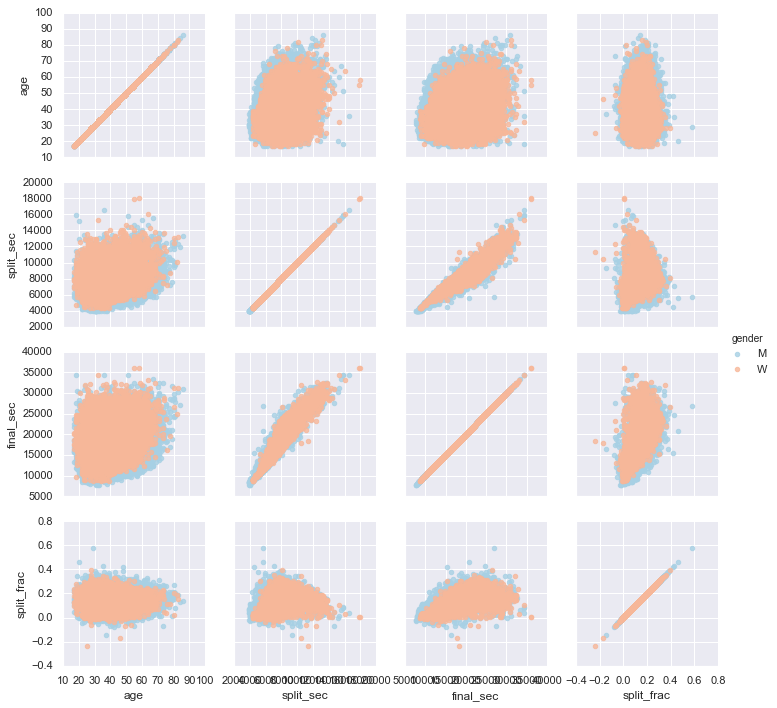

In [155]:
# зависимост между коэф. распределения сил и другими переменными
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

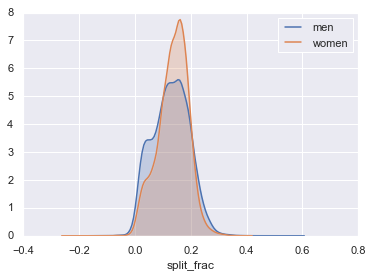

In [162]:
# различия между М и Ж
sns.kdeplot(data.split_frac[data.gender=='M'],
           label = 'men', shade = True)
sns.kdeplot(data.split_frac[data.gender=='W'],
           label = 'women', shade = True)
plt.xlabel('split_frac');

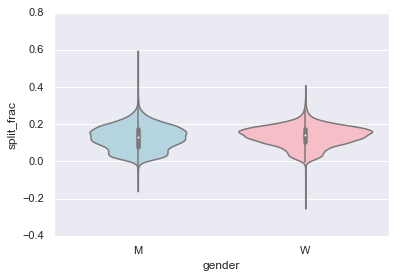

In [163]:
# сравнение распределений с помощью скрипичной диаграммы
sns.violinplot("gender", "split_frac", data=data,
              palette=['lightblue', 'lightpink']);

In [164]:
# создадим столбец с возрастом по десятилетию
data['age_dec'] = data.age.map(lambda age:10*(age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


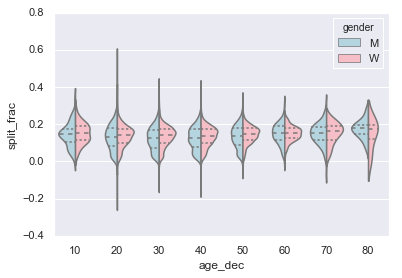

In [165]:
men = (data.gender == 'M')
women = (data.gender == 'W')
with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                  split=True, inner="quartile",
                  palette=['lightblue', 'lightpink'])

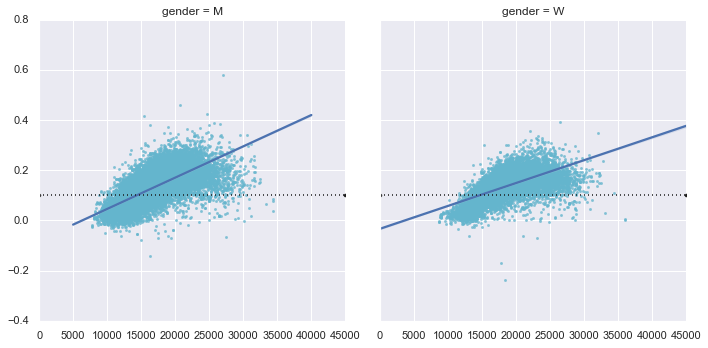

In [166]:
# регрессия между коэф. распределения сил и результатом марафона
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
              markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color='k', ls=":");